# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# Loading and modifying the dataset

In [ ]:
def load_dataset():
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
  data = pd.read_csv(url, index_col=False)
  data.rename(columns={'842302':'Id','M':'Diagnosis','17.99':'radius_mean','10.38':'texture_mean','122.8':'perimeter_mean','1001':'area_mean','0.1184':'smoothness_mean','0.2776':'compactness_mean','0.3001':'concavity_mean','0.1471':'concave_points_mean','0.2419':'symmetry_mean','0.07871':'fractal_dimension_mean',
                       '1.095':'radius_se','0.9053':'texture_se','8.589':'perimeter_se','153.4':'area_se','0.006399':'smoothness_se','0.04904':'compactness_se','0.05373':'concavity_se','0.01587':'concave_points_se','0.03003':'symmetry_se','0.006193':'fractal_dimension_se',
                       '25.38':'radius_worst','17.33':'texture_worst','184.6':'perimeter_worst','2019':'area_worst','0.1622':'smoothness_worst','0.6656':'compactness_worst','0.7119':'concavity_worst','0.2654':'concave_points_worst','0.4601':'symmetry_worst','0.1189':'fractal_dimension_worst'}, inplace=True)
  column_names = list(data.columns.astype('str'))
  data = pd.read_csv(url, index_col=False, names=column_names)
  data.head()
  return data

In [ ]:
training_data=load_dataset()
training_data.head()

In [ ]:
classes_cnt = training_data['Diagnosis'].value_counts()
print(classes_cnt)

In [ ]:
X = training_data.drop(['Diagnosis','Id'], axis=1)
Y = training_data['Diagnosis']
X.head()

In [ ]:
training_data_b = training_data[training_data['Diagnosis'] == 'B']
training_data_m = training_data[training_data['Diagnosis'] == 'M']

# **Histograms**

In [ ]:
ten_features = list(X.columns[0:10])
fig = plt.figure()
for i,j in enumerate(ten_features):
  i +=1
  ax = fig.add_subplot(5,2,i)
  ax.hist(training_data_b[j], label='Benign', stacked = True, alpha=.5, color= 'yellow')
  ax.hist(training_data_m[j], label='Malignant', stacked = True, alpha=.5, color= 'black')
  ax.set_title(j)
  
plt.legend()
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.5, hspace=1, wspace=0.35)
plt.show()

In [ ]:
ten_features = list(X.columns[10:20])
fig = plt.figure()
for i,j in enumerate(ten_features):
  i +=1
  ax = fig.add_subplot(5,2,i)
  ax.hist(training_data_b[j], label='Benign', stacked = True, alpha=.5, color= 'yellow')
  ax.hist(training_data_m[j], label='Malignant', stacked = True, alpha=.5, color= 'black')
  ax.set_title(j)
  
plt.legend()
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.5, hspace=1, wspace=0.35)
plt.show()

In [ ]:
ten_features = list(X.columns[20:30])
fig = plt.figure()
for i,j in enumerate(ten_features):
  i +=1
  ax = fig.add_subplot(5,2,i)
  ax.hist(training_data_b[j], label='Benign', stacked = True, alpha=.5, color= 'yellow')
  ax.hist(training_data_m[j], label='Malignant', stacked = True, alpha=.5, color= 'black')
  ax.set_title(j)
  
plt.legend()
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.5, hspace=1, wspace=0.35)
plt.show()

# **Boxplots**

In [ ]:
ten_features = list(X.columns[0:10])
fig = plt.figure()
for i,j in enumerate(ten_features):
  i +=1
  ax = fig.add_subplot(5,2,i)
  ax.boxplot([training_data_b[j], training_data_m[j]])
  ax.set_title(j)
  
plt.legend()
plt.subplots_adjust(top=8, bottom=0.08, left=0.10, right=1.5, hspace=1, wspace=0.35)
plt.show()

In [ ]:
ten_features = list(X.columns[10:20])
fig = plt.figure()
for i,j in enumerate(ten_features):
  i +=1
  ax = fig.add_subplot(5,2,i)
  ax.boxplot([training_data_b[j], training_data_m[j]])
  ax.set_title(j)
  
plt.legend()
plt.subplots_adjust(top=8, bottom=0.08, left=0.10, right=1.5, hspace=1, wspace=0.35)
plt.show()

In [ ]:
ten_features = list(X.columns[20:30])
fig = plt.figure()
for i,j in enumerate(ten_features):
  i +=1
  ax = fig.add_subplot(5,2,i)
  ax.boxplot([training_data_b[j], training_data_m[j]])
  ax.set_title(j)
  
plt.legend()
plt.subplots_adjust(top=8, bottom=0.08, left=0.10, right=1.5, hspace=1, wspace=0.35)
plt.show()

# Correlation Matrix

In [ ]:
def visualize_coeff_matrix(arg):
  fig = plt.figure(figsize = (15,15))
  plt.imshow(arg, cmap='Reds')
  plt.colorbar()
  plt.xticks([i for i in range(0,arg.shape[0])])
  plt.yticks([i for i in range(0,arg.shape[0])])

In [ ]:
display(X.corr())
visualize_coeff_matrix(X.corr())



*   As it was expected there are very strong correlations between radius, perimeter and area.
*   Compactness, concavity and and concave points are also highly correlated.



In [ ]:
training_data.drop('Id', axis=1, inplace=True)

In [ ]:
training_data['Diagnosis'] = training_data['Diagnosis'].map({'M':1,'B':0})
training_data.head()

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print('Training set has {} samples'.format(len(features_train)))
print('Testing set has {} samples'.format(len(features_test)))
print('Training set has {} samples'.format(len(labels_train)))
print('Testing set has {} samples'.format(len(labels_test)))

Training set has 398 samples
Testing set has 171 samples
Training set has 398 samples
Testing set has 171 samples


#**PCA**



In [ ]:
def plot_pca(X):
  features_number = X.shape[1]
  pca = PCA(n_components=features_number, random_state=42)
  pca.fit(X)
  plt.figure(figsize=(20,8))
  plt.title('PCA Components variance ratio')
  plt.xlabel('PCA Component')
  plt.ylabel('Variance Ratio')
  plt.xticks([i for i in range(1, features_number + 1)])
  plt.plot([i for i in range(1, features_number + 1)], pca.explained_variance_ratio_, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
  plt.show()
  
  plt.figure(figsize=(20,8))
  plt.title('Relation Between Number of PCA Components taken and Covered Variance Ratio')
  plt.xlabel('Number of Taken PCA Components')
  plt.ylabel('Covered Variance Ratio')
  plt.xticks([i for i in range(1, features_number + 1)])
  plt.plot([i for i in range(1, features_number + 1)], pca.explained_variance_ratio_.cumsum(), color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
  plt.show()

In [ ]:
plot_pca(features_train)

In [ ]:
pca = PCA(10, random_state=42)
pca.fit(features_train)
features_train_reduced = pd.DataFrame(pca.transform(features_train))
display(features_train_reduced)

In [ ]:
pca = PCA(10, random_state=42)
pca.fit(features_train)
features_test_reduced = pd.DataFrame(pca.transform(features_test))
display(features_test_reduced)

# **Z-Score**

In [ ]:
features_train_reduced_normalized = features_train_reduced.apply(zscore)
display(features_train_reduced_normalized)

In [ ]:
features_test_reduced_normalized = features_test_reduced.apply(zscore)
display(features_test_reduced_normalized)

# **MinMax**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_train_scaled = pd.DataFrame(data=scaler.fit_transform(features_train), columns=features_train.columns)
features_test_scaled = pd.DataFrame(data=scaler.fit_transform(features_test), columns=features_test.columns)

In [ ]:
labels_train_mapped = labels_train.map({'M':1,'B':0})
labels_train_mapped.describe()
labels_test_mapped = labels_test.map({'M':1,'B':0})

# **IIIIIIIIIIIIIIIIIIIIIIIIIIIIIII**

In [ ]:
from sklearn.metrics import accuracy_score, fbeta_score
from time import time
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    results['pred_time'] = end - start
      
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
      
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
      
    print("{} trained on {} samples, and tests predicted with accuracy {} and fscore {}".format(learner.__class__.__name__, len(X_train), results['acc_test'], results['f_test']))
    return results

In [ ]:
results = {}
results_reduced = {}
results_reduced_normalized = {}

In [ ]:
display(labels_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, features_train, labels_train_mapped , features_test, labels_test_mapped)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, features_train_reduced, labels_train_mapped, features_test_reduced, labels_test_mapped)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped)
print('After Scaling Using MinMaxScaler')
train_predict(clf, features_train_scaled, labels_train_mapped, features_test_scaled, labels_test_mapped);

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=.1)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, features_train, labels_train_mapped , features_test, labels_test_mapped)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, features_train_reduced, labels_train_mapped, features_test_reduced, labels_test_mapped)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped)
print('After Scaling Using MinMaxScaler')
train_predict(clf, features_train_scaled, labels_train_mapped, features_test_scaled, labels_test_mapped);

Before Preprocessing
AdaBoostClassifier trained on 398 samples, and tests predicted with accuracy 0.9532163742690059 and fscore 0.9365079365079364
After Applying PCA
AdaBoostClassifier trained on 398 samples, and tests predicted with accuracy 0.9590643274853801 and fscore 0.9570957095709571
After Applying PCA and Z Normalization
AdaBoostClassifier trained on 398 samples, and tests predicted with accuracy 0.9532163742690059 and fscore 0.9446254071661235
After Scaling Using MinMaxScaler
AdaBoostClassifier trained on 398 samples, and tests predicted with accuracy 0.9122807017543859 and fscore 0.84


**max_depth default value = none.**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, features_train, labels_train_mapped , features_test, labels_test_mapped)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, features_train_reduced, labels_train_mapped, features_test_reduced, labels_test_mapped)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped)
print('After Scaling Using MinMaxScaler')
train_predict(clf, features_train_scaled, labels_train_mapped, features_test_scaled, labels_test_mapped);

Before Preprocessing
RandomForestClassifier trained on 398 samples, and tests predicted with accuracy 0.9590643274853801 and fscore 0.9570957095709571
After Applying PCA
RandomForestClassifier trained on 398 samples, and tests predicted with accuracy 0.9707602339181286 and fscore 0.9830508474576272
After Applying PCA and Z Normalization
RandomForestClassifier trained on 398 samples, and tests predicted with accuracy 0.9590643274853801 and fscore 0.9570957095709571
After Scaling Using MinMaxScaler
RandomForestClassifier trained on 398 samples, and tests predicted with accuracy 0.9415204678362573 and fscore 0.8933717579250718


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
import matplotlib.patches as mpatches
def evaluate(results, title):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (25,10))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00AFFD','#00AB0A','#C0A0AA', '#ADA000']
    
    # classifier
    for k, learner in enumerate(results.keys()):
        # metric
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
              # Creative plot code
              ax[int(j/3), j%3].bar(k*bar_width, results[learner][metric], width=bar_width, color=colors[k])
              ax[int(j/3), j%3].set_xticks([0.45, 1.45, 2.45])
              ax[int(j/3), j%3].set_xlabel("Classiifer Algorithm")
              ax[int(j/3), j%3].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor=(-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle(title, fontsize = 16, y = 1.02)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


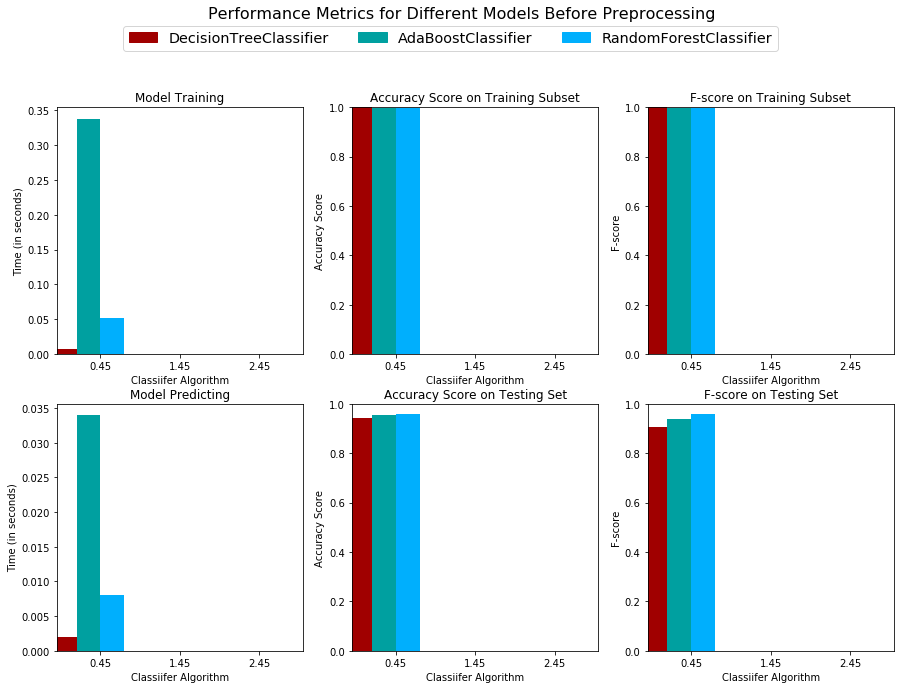

In [ ]:
evaluate(results, "Performance Metrics for Different Models Before Preprocessing")

**Model Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

def tune_model(clf, parameters, X_train, y_train, X_test, y_test):
  scorer = make_scorer(fbeta_score, beta=1)
  grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, n_jobs= -1)
  grid_fit = grid_obj.fit(X_train, y_train)
  # Get the best estimator
  best_clf = grid_fit.best_estimator_
  # Get predictions 
  predictions = (clf.fit(X_train, y_train)).predict(X_test)
  best_predictions = best_clf.predict(X_test)
  
  print("Untuned model")
  print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
  print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta=1)))
  print('-------------------------------')
  print("Tuned Model")
  print("Best accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
  print("Best F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
  print('-------------------------------')
  print("Best parameters found:", grid_fit.best_params_)
  print('-------------------------------')
  display(pd.DataFrame(grid_obj.cv_results_))
  return {'old_clf' : clf.fit(X_train, y_train), 'tuned_clf' : best_clf}

In [ ]:
parameters = {'max_depth':range(1, 10)}
clf = DecisionTreeClassifier(random_state=42)
tune_model(clf, parameters, features_train, labels_train_mapped, features_test, labels_test_mapped);

In [ ]:
parameters = {'n_estimators':range(100,500,100),'max_depth':range(1,10)}
clf = RandomForestClassifier(random_state=42, n_jobs=-1)  
tune_model(clf, parameters, features_train, labels_train_mapped, features_test, labels_test_mapped);

In [ ]:
import numpy as pynum_float
parameters = {'n_estimators':range(100, 500, 100), 'learning_rate':pynum_float.arange(0.1,1,0.1)}
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), learning_rate=0.2, random_state=6)
tune_model(clf, parameters, features_train, labels_train_mapped, features_test, labels_test_mapped);

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

final_model = DecisionTreeClassifier(max_depth=2,random_state=42)
final_model.fit(features_train, labels_train)
labels_pred = final_model.predict(features_test)
labels_true = labels_test

In [ ]:
print(classification_report(labels_true, labels_pred))
print(confusion_matrix(labels_test, labels_pred))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94       108
           M       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

[[102   6]
 [  6  57]]


In [ ]:
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, learning_rate=0.1, random_state=6)
ada_model.fit(features_train, labels_train)
labels_pred_ada = ada_model.predict(features_test)
labels_true_ada = labels_test

In [ ]:
print(classification_report(labels_true_ada, labels_pred_ada))
print(confusion_matrix(labels_test, labels_pred_ada))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

[[101   7]
 [  4  59]]


In [ ]:
forest_model = RandomForestClassifier(n_estimators=200, max_depth=6)
forest_model.fit(features_train, labels_train)
labels_pred_forest = forest_model.predict(features_test)
labels_true_forest = labels_test

In [ ]:
print(classification_report(labels_true_forest, labels_pred_forest))
print(confusion_matrix(labels_test, labels_pred_forest))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   1]
 [  4  59]]


# ***Lab 3***

In [ ]:
results = {}

Classification:

1- KNN :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, features_train, labels_train_mapped, features_test, labels_test_mapped)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, features_train_reduced, labels_train_mapped, features_test_reduced, labels_test_mapped)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped)
print('After Scaling Using MinMaxScaler')
train_predict(clf, features_train_scaled, labels_train_mapped, features_test_scaled, labels_test_mapped);

Before Preprocessing
KNeighborsClassifier trained on 398 samples, and tests predicted with accuracy 0.9415204678362573 and fscore 0.9283387622149838
After Applying PCA
KNeighborsClassifier trained on 398 samples, and tests predicted with accuracy 0.9415204678362573 and fscore 0.9283387622149838
After Applying PCA and Z Normalization
KNeighborsClassifier trained on 398 samples, and tests predicted with accuracy 0.9473684210526315 and fscore 0.9581881533101045
After Scaling Using MinMaxScaler
KNeighborsClassifier trained on 398 samples, and tests predicted with accuracy 0.9473684210526315 and fscore 0.9037900874635569


2- SVM :

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, features_train, labels_train_mapped, features_test, labels_test_mapped)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, features_train_reduced, labels_train_mapped, features_test_reduced, labels_test_mapped)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped)
print('After Scaling Using MinMaxScaler')
train_predict(clf, features_train_scaled, labels_train_mapped, features_test_scaled, labels_test_mapped);

Before Preprocessing
LinearSVC trained on 398 samples, and tests predicted with accuracy 0.9298245614035088 and fscore 0.9550561797752809
After Applying PCA
LinearSVC trained on 398 samples, and tests predicted with accuracy 0.16374269005847952 and fscore 0.13347022587268995
After Applying PCA and Z Normalization
LinearSVC trained on 398 samples, and tests predicted with accuracy 0.9590643274853801 and fscore 0.9570957095709571
After Scaling Using MinMaxScaler
LinearSVC trained on 398 samples, and tests predicted with accuracy 0.8947368421052632 and fscore 0.813953488372093


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3- Non-linear SVM : (Takes more time but more accurate than Linear SVM)

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto_deprecated',kernel='rbf')
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, features_train, labels_train_mapped, features_test, labels_test_mapped)
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, features_train_reduced, labels_train_mapped, features_test_reduced, labels_test_mapped)
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped)
print('After Scaling Using MinMaxScaler')
train_predict(clf, features_train_scaled, labels_train_mapped, features_test_scaled, labels_test_mapped);

Before Preprocessing
SVC trained on 398 samples, and tests predicted with accuracy 0.631578947368421 and fscore 0.0
After Applying PCA
SVC trained on 398 samples, and tests predicted with accuracy 0.631578947368421 and fscore 0.0
After Applying PCA and Z Normalization
SVC trained on 398 samples, and tests predicted with accuracy 0.9707602339181286 and fscore 0.9646302250803858
After Scaling Using MinMaxScaler
SVC trained on 398 samples, and tests predicted with accuracy 0.9824561403508771 and fscore 0.9717868338557992


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samp

The main advantage of scaling is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. Another advantage is to avoid numerical diculties during the calculation. Because kernel values usually depend on the inner products of feature vectors, e.g. the linear kernel and the polynomial ker- nel, large attribute values might cause numerical problems. We recommend linearly scaling each attribute to the range [-1,+1] or [0,1].

4- Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=6)
print('Before Preprocessing')
results[clf.__class__.__name__] = train_predict(clf, features_train, labels_train_mapped, features_test, labels_test_mapped);
print('After Applying PCA')
results_reduced[clf.__class__.__name__] = train_predict(clf, features_train_reduced, labels_train_mapped, features_test_reduced, labels_test_mapped);
print('After Applying PCA and Z Normalization')
results_reduced_normalized[clf.__class__.__name__] = train_predict(clf, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped);
print('After Scaling Using MinMaxScaler')
train_predict(clf, features_train_scaled, labels_train_mapped, features_test_scaled, labels_test_mapped);

Before Preprocessing
LogisticRegression trained on 398 samples, and tests predicted with accuracy 0.9649122807017544 and fscore 0.9609120521172639
After Applying PCA
LogisticRegression trained on 398 samples, and tests predicted with accuracy 0.9707602339181286 and fscore 0.9646302250803858
After Applying PCA and Z Normalization
LogisticRegression trained on 398 samples, and tests predicted with accuracy 0.9649122807017544 and fscore 0.9698996655518395
After Scaling Using MinMaxScaler
LogisticRegression trained on 398 samples, and tests predicted with accuracy 0.9590643274853801 and fscore 0.9253731343283581


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Comparison :

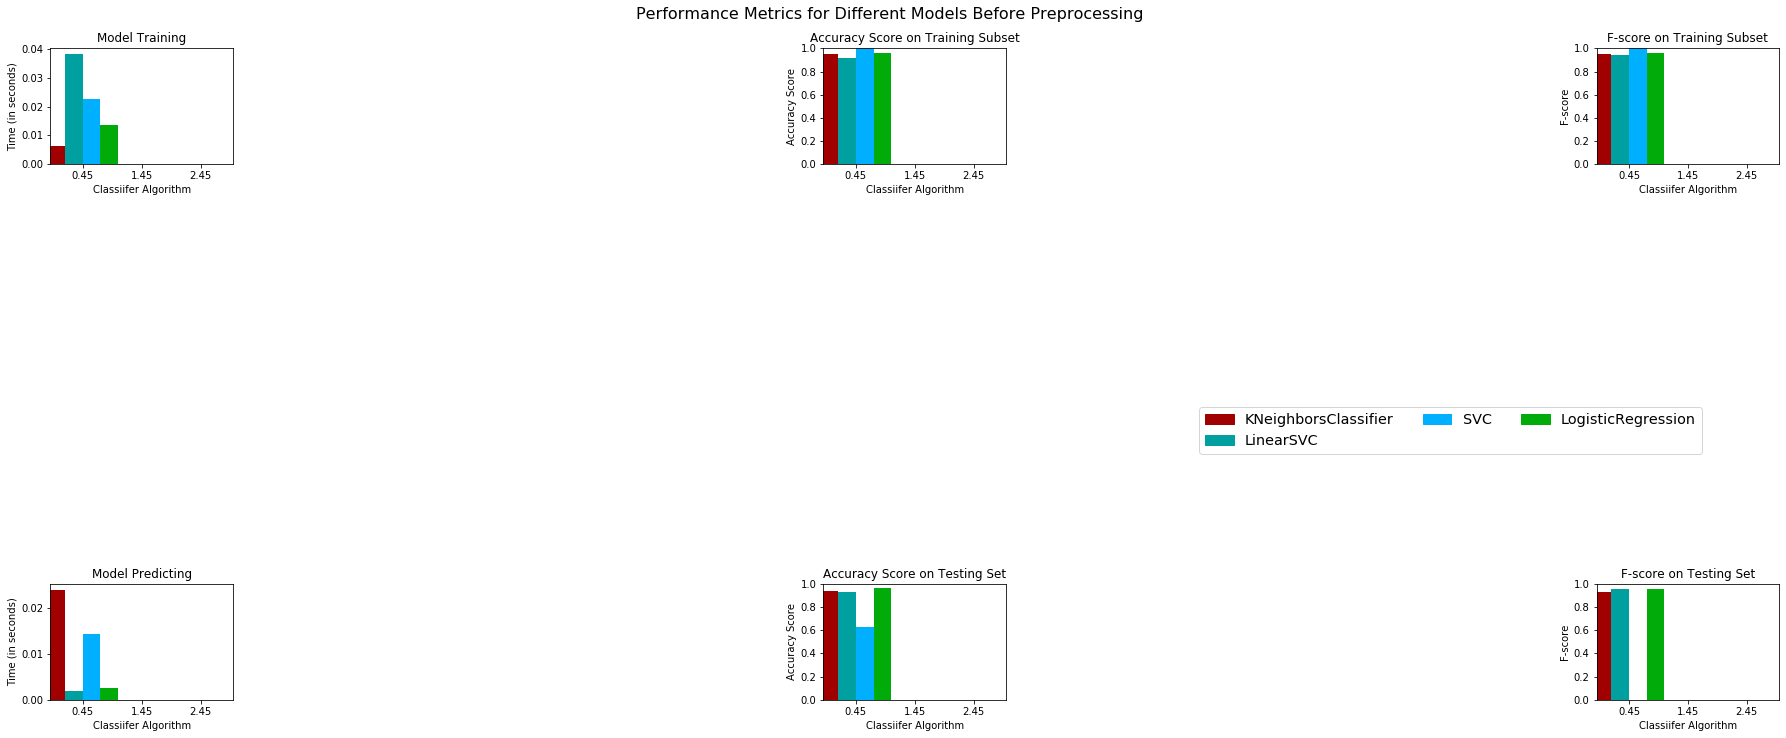

In [ ]:
evaluate(results, "Performance Metrics for Different Models Before Preprocessing")


Parameter Tuning :

1- KNN :

In [ ]:
parameters = {'n_neighbors':range(1,20)}
clf = KNeighborsClassifier()  
tune_model(clf, parameters, features_train, labels_train_mapped, features_test, labels_test_mapped);


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Untuned model
Accuracy score on testing data: 0.9591
F-score on testing data: 0.9421
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.9591
Best F-score on the testing data: 0.9421
-------------------------------
Best parameters found: {'n_neighbors': 5}
-------------------------------


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006009,0.000679,0.013164,0.000985,1,{'n_neighbors': 1},0.875000,0.888889,0.860215,0.874738,0.011700,6
1,0.004136,0.000421,0.014370,0.001121,2,{'n_neighbors': 2},0.891304,0.901099,0.850575,0.881069,0.021851,3
2,0.006581,0.001973,0.012205,0.000684,3,{'n_neighbors': 3},0.872340,0.907216,0.857143,0.878955,0.020960,4
3,0.004125,0.000393,0.012431,0.001216,4,{'n_neighbors': 4},0.869565,0.891304,0.840909,0.867326,0.020622,15
4,0.004192,0.000088,0.013574,0.001496,5,{'n_neighbors': 5},0.881720,0.905263,0.879121,0.888726,0.011764,1
5,0.003962,0.000157,0.011925,0.000332,6,{'n_neighbors': 6},0.869565,0.891304,0.853933,0.871645,0.015318,9
6,0.004255,0.000149,0.011962,0.000730,7,{'n_neighbors': 7},0.869565,0.905263,0.857143,0.877374,0.020397,5
7,0.004129,0.000438,0.012579,0.001065,8,{'n_neighbors': 8},0.869565,0.893617,0.844444,0.869271,0.020063,11
8,0.004228,0.000445,0.012186,0.000627,9,{'n_neighbors': 9},0.881720,0.918367,0.844444,0.881604,0.030160,2
9,0.004166,0.000164,0.012438,0.000832,10,{'n_neighbors': 10},0.857143,0.884211,0.831461,0.857670,0.021525,19


2- SVM :

In [ ]:
parameters = {'C':[0.01, 0.1, 1, 10, 1000, 1500, 2000]}
clf = LinearSVC(random_state=6)
tune_model(clf, parameters, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Untuned model
Accuracy score on testing data: 0.9591
F-score on testing data: 0.9431
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.9649
Best F-score on the testing data: 0.9516
-------------------------------
Best parameters found: {'C': 10}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004831,0.000459,0.003048,0.000227,0.01,{'C': 0.01},0.918367,0.938776,0.881720,0.913033,0.023583,6
1,0.005248,0.001117,0.002789,0.000055,0.1,{'C': 0.1},0.907216,0.950495,0.884211,0.914049,0.027473,5
2,0.008538,0.003854,0.002926,0.000131,1,{'C': 1},0.918367,0.960784,0.905263,0.928196,0.023698,3
3,0.010166,0.002479,0.002820,0.000194,10,{'C': 10},0.929293,0.969697,0.905263,0.934825,0.026579,1
4,0.008473,0.001413,0.002700,0.000142,1000,{'C': 1000},0.938776,0.864865,0.918367,0.907308,0.031200,7
5,0.010052,0.000401,0.002679,0.000091,1500,{'C': 1500},0.938776,0.947368,0.909091,0.931802,0.016380,2
6,0.008002,0.001193,0.002821,0.000090,2000,{'C': 2000},0.938776,0.947368,0.893617,0.926670,0.023547,4


3- Non-linear SVM:

In [ ]:
parameters = {'C':[0.01, 0.1, 1, 10, 1000, 1500, 2000], 'gamma':[0.01,0.1,1,1.1,2]}
clf = svm.SVC(kernel='rbf')
tune_model(clf, parameters, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Untuned model
Accuracy score on testing data: 0.9708
F-score on testing data: 0.9600
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.9708
Best F-score on the testing data: 0.9600
-------------------------------
Best parameters found: {'C': 1, 'gamma': 0.1}
-------------------------------


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008732,0.001022,0.005346,0.000602,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.000000,0.000000,0.000000,0.000000,0.000000,28
1,0.007765,0.001464,0.004277,0.000138,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.000000,0.000000,0.000000,0.000000,0.000000,28
2,0.008180,0.001358,0.005812,0.001932,0.01,1,"{'C': 0.01, 'gamma': 1}",0.000000,0.000000,0.000000,0.000000,0.000000,28
3,0.008630,0.001631,0.004425,0.000079,0.01,1.1,"{'C': 0.01, 'gamma': 1.1}",0.000000,0.000000,0.000000,0.000000,0.000000,28
4,0.007873,0.000192,0.005560,0.001285,0.01,2,"{'C': 0.01, 'gamma': 2}",0.000000,0.000000,0.000000,0.000000,0.000000,28
5,0.009156,0.002482,0.004839,0.000895,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.039216,0.000000,0.000000,0.013105,0.018498,27
6,0.007518,0.001647,0.003958,0.000064,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.851064,0.929293,0.860215,0.880241,0.034950,10
7,0.009526,0.002926,0.004314,0.000177,0.1,1,"{'C': 0.1, 'gamma': 1}",0.000000,0.000000,0.000000,0.000000,0.000000,28
8,0.009810,0.003260,0.004332,0.000093,0.1,1.1,"{'C': 0.1, 'gamma': 1.1}",0.000000,0.000000,0.000000,0.000000,0.000000,28
9,0.008096,0.000113,0.004674,0.000143,0.1,2,"{'C': 0.1, 'gamma': 2}",0.000000,0.000000,0.000000,0.000000,0.000000,28


4- Logistic Regression :

In [ ]:
parameters = {'C':[0.01, 0.1, 1, 10, 1000,1500,2000]}
clf = LogisticRegression()
tune_model(clf, parameters, features_train_reduced_normalized, labels_train_mapped, features_test_reduced_normalized, labels_test_mapped);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Untuned model
Accuracy score on testing data: 0.9649
F-score on testing data: 0.9508
-------------------------------
Tuned Model
Best accuracy score on the testing data: 0.9649
Best F-score on the testing data: 0.9516
-------------------------------
Best parameters found: {'C': 1000}
-------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004825,0.000879,0.003038,0.000140,0.01,{'C': 0.01},0.916667,0.916667,0.891304,0.908255,0.011941,7
1,0.006401,0.004027,0.002859,0.000136,0.1,{'C': 0.1},0.918367,0.949495,0.881720,0.916615,0.027679,5
2,0.003880,0.000093,0.004392,0.002222,1,{'C': 1},0.907216,0.950495,0.872340,0.910112,0.031952,6
3,0.004241,0.000103,0.004172,0.002112,10,{'C': 10},0.918367,0.960784,0.895833,0.925068,0.026921,4
4,0.006474,0.003186,0.004350,0.002242,1000,{'C': 1000},0.929293,0.969697,0.918367,0.939171,0.022080,1
5,0.004529,0.000287,0.002827,0.000127,1500,{'C': 1500},0.929293,0.969697,0.918367,0.939171,0.022080,1
6,0.004300,0.000073,0.003535,0.001852,2000,{'C': 2000},0.929293,0.969697,0.918367,0.939171,0.022080,1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Model After Tuning :

The best model is Nonlinear SVM with

---
Best accuracy score on the testing data: 0.9708

Best F-score on the testing data: 0.9600

-------------------------------
Best parameters found: {'C': 1, 'gamma': 0.1}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


final_model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
final_model.fit(features_train, labels_train)
y_pred = final_model.predict(features_test)
y_true = labels_test

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           B       0.63      1.00      0.77       108
           M       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print(confusion_matrix(labels_test, y_pred))

[[108   0]
 [ 63   0]]


Conclusion :